In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === File Paths ===
PATIENTS_FILE = 'patients.csv'
CONDITIONS_FILE = 'conditions.csv'
IMAGING_FILE = 'imaging_studies.csv'
CLEANED_DATA_FILE = 'cleaned_data.csv'

# === Load CSVs ===
patients = pd.read_csv(PATIENTS_FILE)
conditions = pd.read_csv(CONDITIONS_FILE)
imaging = pd.read_csv(IMAGING_FILE)

# === Rename columns to avoid merge conflicts ===
conditions = conditions.rename(columns={'PATIENT': 'Id_PATIENT', 'DESCRIPTION': 'Condition'})
imaging = imaging.rename(columns={'PATIENT': 'Id_PATIENT', 'MODALITY_CODE': 'Modality'})

# === Merge data ===
df = patients.merge(conditions[['Id_PATIENT', 'Condition']], left_on='Id', right_on='Id_PATIENT')
df = df.merge(imaging[['Id_PATIENT', 'Modality']], on='Id_PATIENT')

# === Filter unwanted conditions ===
exclude = ['finding', 'situation', 'Medication review']
df = df[~df['Condition'].str.contains('|'.join(exclude), case=False, na=False)]

# === Calculate age ===
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], errors='coerce')
df['Age'] = ((pd.Timestamp.now() - df['BIRTHDATE']).dt.days // 365)

# === Replace marital codes ===
df['MARITAL'] = df['MARITAL'].replace({'S': 'Single', 'M': 'Married', 'D': 'Divorced', 'W': 'Widowed'})

# == Remove Duplicates ===
df = df.drop_duplicates()

# === Save cleaned data ===
df.to_csv(CLEANED_DATA_FILE, index=False)
print(f"✅ Cleaned data saved to {CLEANED_DATA_FILE}")

✅ Cleaned data saved to cleaned_data.csv


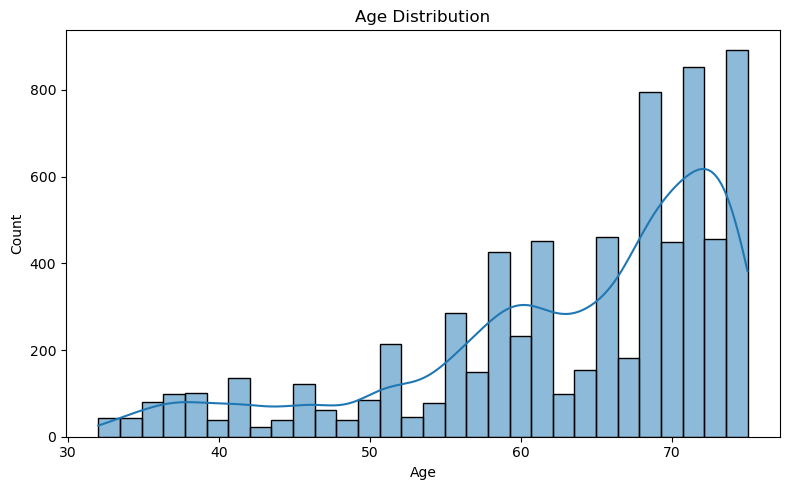

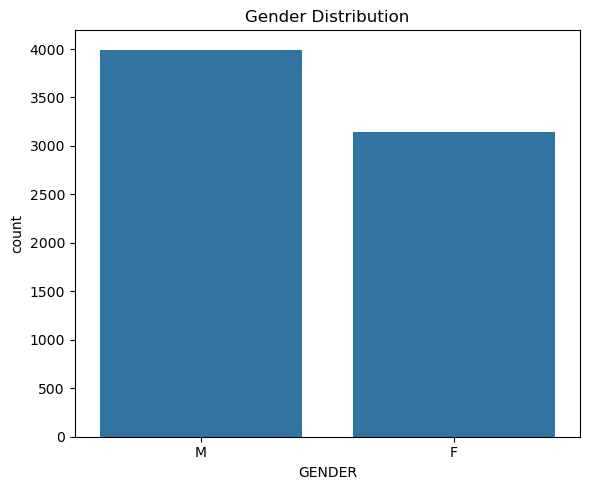

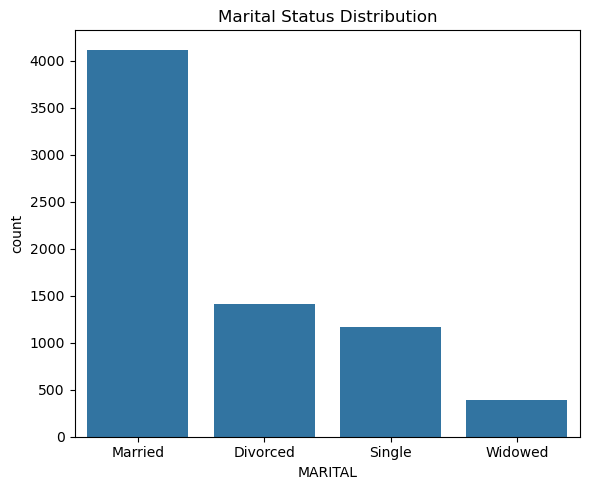

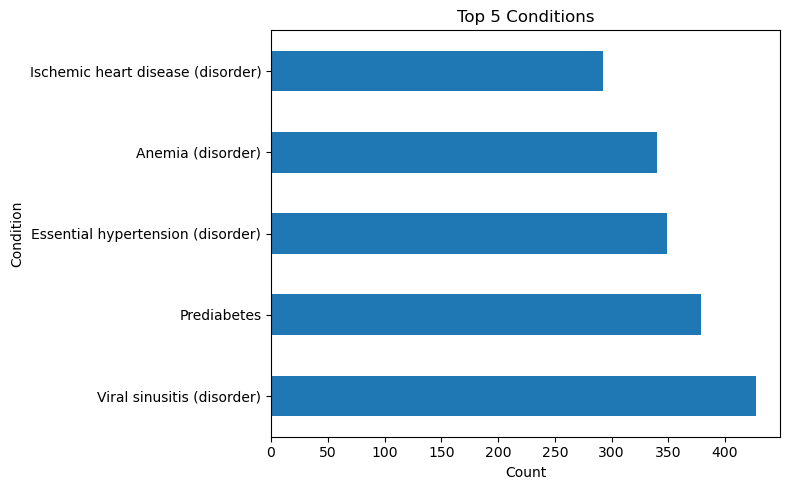

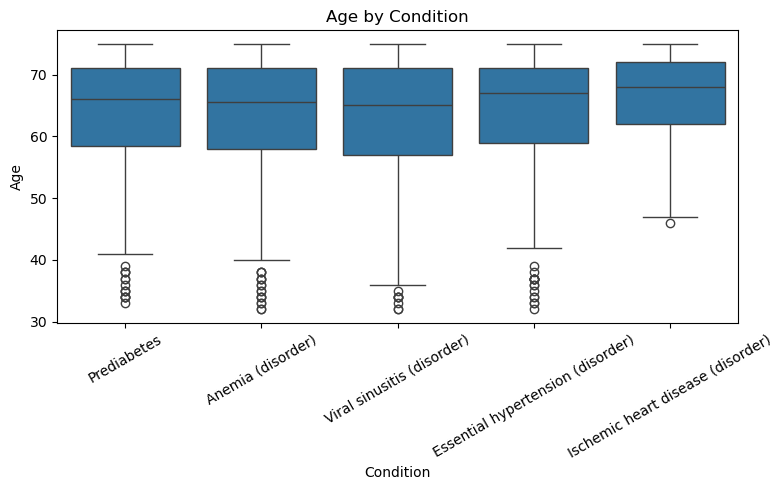

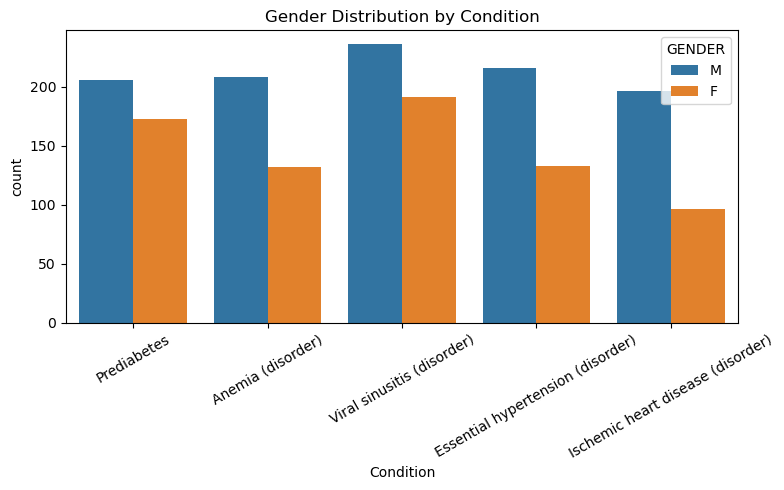

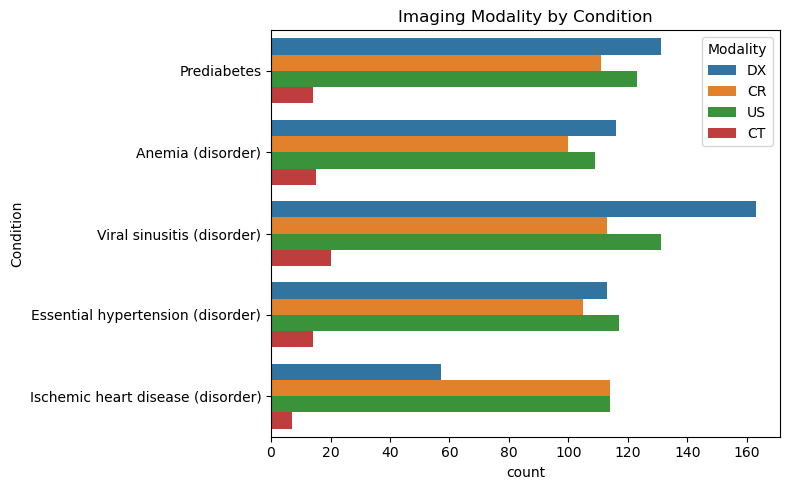

✅ All plots saved.


In [36]:
# Get top 5 reported conditions
top_conditions = df['Condition'].value_counts().nlargest(5).index
top_df = df[df['Condition'].isin(top_conditions)]


# === PLOT 1: Age Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
#plt.savefig('plot1_age_distribution.png') # Remove '#' to save plot
plt.show()

# === PLOT 2: Gender Distribution ===
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='GENDER')
plt.title('Gender Distribution')
plt.tight_layout()
#plt.savefig('plot2_gender_distribution.png')
plt.show()

# === PLOT 3: Marital Status Distribution ===
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='MARITAL')
plt.title('Marital Status Distribution')
plt.tight_layout()
#plt.savefig('plot3_marital_status.png')
plt.show()

# === PLOT 4: Top Conditions ===
plt.figure(figsize=(8, 5))
top_df['Condition'].value_counts().plot(kind='barh')
plt.title('Top 5 Conditions')
plt.xlabel('Count')
plt.tight_layout()
#plt.savefig('plot4_top_conditions.png')
plt.show()

# === PLOT 5: Age by Condition ===
plt.figure(figsize=(8, 5))
sns.boxplot(data=top_df, x='Condition', y='Age')
plt.title('Age by Condition')
plt.xticks(rotation=30)
plt.tight_layout()
#plt.savefig('plot5_age_by_condition.png')
plt.show()

# === PLOT 6: Gender vs Condition ===
plt.figure(figsize=(8, 5))
sns.countplot(data=top_df, x='Condition', hue='GENDER')
plt.title('Gender Distribution by Condition')
plt.xticks(rotation=30)
plt.tight_layout()
#plt.savefig('plot6_gender_by_condition.png')
plt.show()

# === PLOT 7: Modality by Condition ===
plt.figure(figsize=(8, 5))
sns.countplot(data=top_df, y='Condition', hue='Modality')
plt.title('Imaging Modality by Condition')
plt.tight_layout()
#plt.savefig('plot7_modality_by_condition.png')
plt.show()

print("✅ All plots saved.")